<a href="https://colab.research.google.com/github/kimbaorrr/colab_exercises/blob/main/NDDT/NDDT_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Chuyển đổi giữa các hệ màu
image = np.uint8([[[125, 25, 168]]])
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print(hsv)

[[[159 217 168]]]


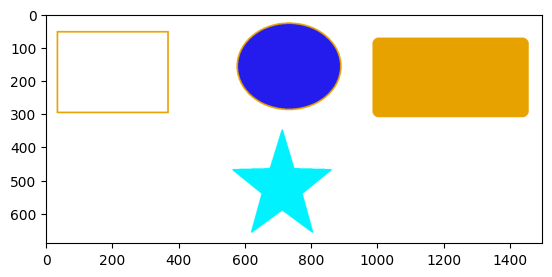

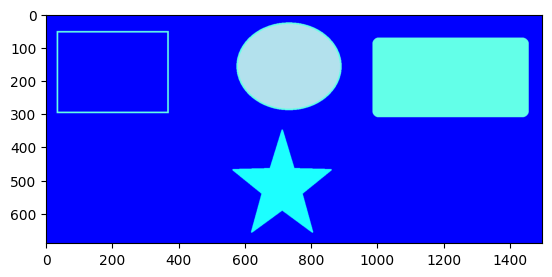

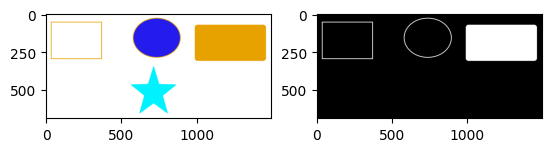

In [ ]:
# LỌC ĐỐI TƯỢNG MÀU CHO ẢNH
image = cv2.imread('binbin.png', cv2.COLOR_RGB2BGR)
plt.imshow(image)
plt.show()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv, cmap='gray')
plt.show()

min_mau = np.array([97, 255, 232])
max_mau = np.array([100, 255, 232])
mask = cv2.inRange(hsv, min_mau, max_mau)

plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.show()



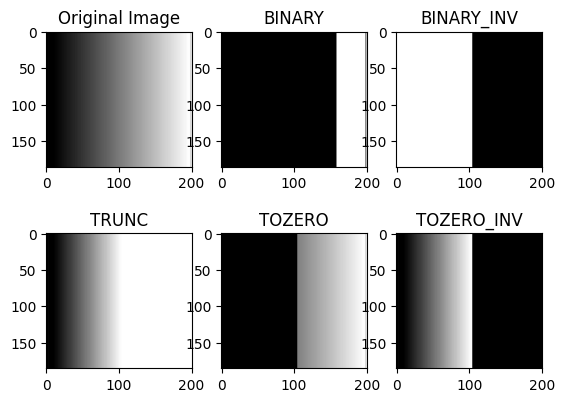

In [ ]:
# Phân ngưỡng ảnh đơn giản
img = cv2.imread('gradient.jpg', cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(img,200,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.imshow(images[i], cmap='gray')
  plt.title(titles[i])
plt.show()




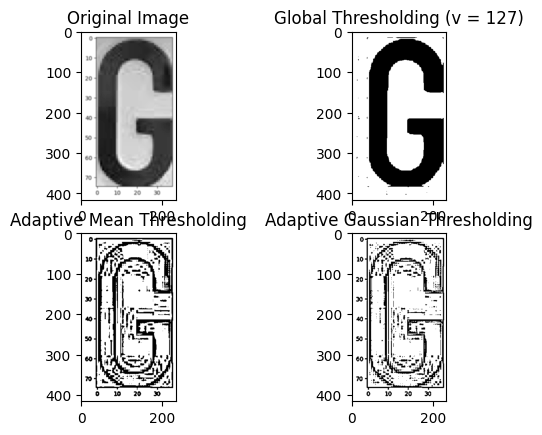

In [ ]:
# Adaptive Thresholding (phân ngưỡng thích nghi)

img = cv2.imread('g.png', cv2.IMREAD_GRAYSCALE)
img = cv2.GaussianBlur(img,(5, 5),0)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(images[i],'gray')
  plt.title(titles[i])
plt.show()


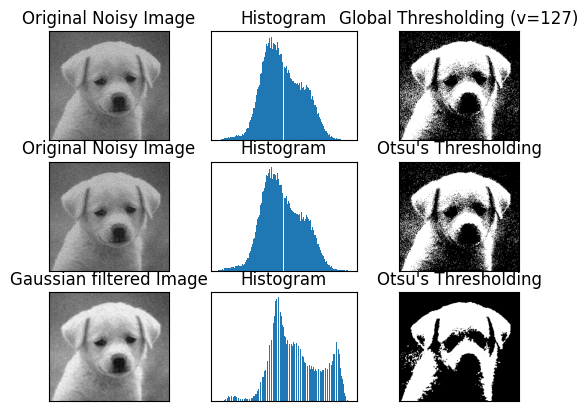

In [ ]:
# Otsu’s Binarization

img = cv2.imread('dog.png', cv2.IMREAD_GRAYSCALE)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
  plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
  plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
  plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
  plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
  plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
